Выполнила Арина Петросян     
Группа БЭК181

### Загружаем данные

In [ ]:
!git clone https://github.com/Arina1308/hw2_data_analysis

Cloning into 'hw2_data_analysis'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 3), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
data_tr = pd.read_csv('/content/hw2_data_analysis/demand-forecasting-in-retail/train.csv')
store_loc = pd.read_csv('/content/hw2_data_analysis/demand-forecasting-in-retail/STORE_LOCATION.csv', ';')

In [ ]:
display(data_tr.columns)
display(store_loc.columns)

Index(['Unnamed: 0', 'product_rk', 'store_location_rk', 'period_start_dt',
       'demand', 'PROMO1_FLAG', 'PROMO2_FLAG', 'PRICE_REGULAR',
       'PRICE_AFTER_DISC', 'NUM_CONSULTANT', 'AUTORIZATION_FLAG'],
      dtype='object')

Index(['STORE_LOCATION_RK', 'STORE_LOCATION_LVL_RK4', 'STORE_LOCATION_LVL_RK3',
       'STORE_LOCATION_LVL_RK2', 'STORE_LOCATION_LVL_RK1', 'STORE_OPEN_DTTM',
       'STORE_CLOSURE_DTTM', 'STORE_LOCATION_ADK_hashing',
       'STORE_LOCATION_ATTRIB1_hashing', 'STORE_LOCATION_ATTRIB2_hashing',
       'STORE_LOCATION_ATTRIB3_hashing', 'STORE_LOCATION_ATTRIB4_hashing',
       'STORE_LOCATION_ATTRIB5_hashing', 'STORE_LOCATION_ATTRIB6_hashing',
       'STORE_LOCATION_ATTRIB7_hashing', 'STORE_LOCATION_ATTRIB8_hashing',
       'STORE_LOCATION_ATTRIB9_hashing', 'STORE_LOCATION_ATTRIB10_hashing',
       'STORE_LOCATION_ATTRIB11_hashing', 'STORE_LOCATION_ATTRIB12_hashing',
       'STORE_LOCATION_ATTRIB13_hashing', 'STORE_LOCATION_ATTRIB14_hashing',
       'STORE_LOCATION_ATTRIB15_hashing', 'STORE_LOCATION_ATTRIB16_hashing',
       'STORE_LOCATION_ATTRIB17_hashing', 'STORE_LOCATION_ATTRIB18_hashing',
       'STORE_LOCATION_ATTRIB19_hashing', 'STORE_LOCATION_ATTRIB20_hashing',
       'STORE_LOCATION

In [ ]:
store_loc.rename(columns={'STORE_LOCATION_RK': 'store_location_rk'}, inplace=True)

In [ ]:
data = data_tr.merge(store_loc, on='store_location_rk')

# 1. Обработка данных

 - ### Удаляем строки и колонки



In [ ]:
display(data.head())
display(data.shape)

,Unnamed: 0,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,STORE_LOCATION_ADK_hashing,STORE_LOCATION_ATTRIB1_hashing,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB5_hashing,STORE_LOCATION_ATTRIB6_hashing,STORE_LOCATION_ATTRIB7_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing
0,0,40369,309,2016-12-19,29.0,NaN,NaN,NaN,NaN,NaN,NaN,203,203,10,1,15Mar2018:14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,B5A368A9689D233843CB7A34709BD45B,1D870936A2C35AA44CB0CF9B6210FB74,F5126A9BDB60B4C8F3B1680AF38B33B9,75300434BE16A57FD386B22D19B289D5,BC0EB006F36BC82F8E165D6D4E95F207,F2D475B39396781ED7F2D76E648AFAE4,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1,1,40370,309,2016-12-19,64.0,NaN,NaN,NaN,NaN,NaN,NaN,203,203,10,1,15Mar2018:14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,B5A368A9689D233843CB7A34709BD45B,1D870936A2C35AA44CB0CF9B6210FB74,F5126A9BDB60B4C8F3B1680AF38B33B9,75300434BE16A57FD386B22D19B289D5,BC0EB006F36BC82F8E165D6D4E95F207,F2D475B39396781ED7F2D76E648AFAE4,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
2,2,40372,309,2016-12-19,32.0,NaN,NaN,NaN,NaN,NaN,NaN,203,203,10,1,15Mar2018:14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,B5A368A9689D233843CB7A34709BD45B,1D870936A2C35AA44CB0CF9B6210FB74,F5126A9BDB60B4C8F3B1680AF38B33B9,75300434BE16A57FD386B22D19B289D5,BC0EB006F36BC82F8E165D6D4E95F207,F2D475B39396781ED7F2D76E648AFAE4,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
3,3,40373,309,2016-12-19,10.0,NaN,NaN,NaN,NaN,NaN,NaN,203,203,10,1,15Mar2018:14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,B5A368A9689D233843CB7A34709BD45B,1D870936A2C35AA44CB0CF9B6210FB74,F5126A9BDB60B4C8F3B1680AF38B33B9,75300434BE16A57FD386B22D19B289D5,BC0EB006F36BC82F8E165D6D4E95F207,F2D475B39396781ED7F2D76E648AFAE4,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1

(35344, 39)

In [ ]:
display(data[data.demand.isna()].store_location_rk.unique())
display(data.store_location_rk.unique())

array([ 317,  355,  380,  425,  453,  504,  517,  525,  533,  535,  540,
        555,  557,  562,  637,  644,  657,  764,  798,  862,  866,  874,
       1005, 1034, 1079, 1080, 1143, 1162, 1173, 1185, 1191, 1202, 1203,
       1281, 1316, 1326, 1328, 1347, 1363, 1380])

array([ 309,  317,  355,  380,  425,  453,  504,  517,  525,  533,  535,
        540,  555,  557,  562,  637,  644,  657,  764,  798,  862,  866,
        874, 1005, 1034, 1079, 1080, 1143, 1162, 1173, 1185, 1191, 1202,
       1203, 1281, 1316, 1326, 1328, 1347, 1363, 1380])

В тесте нет 309 магазина, поэтому выкинем все записи по нему из данных

In [ ]:
data = data[data.store_location_rk != 309]

In [ ]:
data.isnull().sum()[data.isnull().sum() > 0]

demand               1200
PROMO1_FLAG           170
PROMO2_FLAG           170
PRICE_REGULAR        1112
PRICE_AFTER_DISC     1117
NUM_CONSULTANT        170
AUTORIZATION_FLAG     170
dtype: int64

In [ ]:
data.describe()

,Unnamed: 0,product_rk,store_location_rk,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1
count,35329.00000,35329.000000,35329.000000,34129.000000,35159.000000,35159.0,34217.000000,34212.000000,35159.0,35159.000000,35329.000000,35329.000000,35329.0,35329.0
mean,17774.09437,49257.002576,844.467406,12.226552,0.206434,0.0,1167.679357,1155.778351,0.0,0.907677,134.203063,134.203063,10.0,1.0
std,10253.68736,19148.409051,333.117293,32.585194,0.433393,0.0,1046.828551,1057.912830,0.0,0.289486,82.732522,82.732522,0.0,0.0
min,15.00000,40369.000000,317.000000,0.000000,0.000000,0.0,49.000000,8.647059,0.0,0.000000,25.000000,25.000000,10.0,1.0
25%,8893.00000,40370.000000,535.000000,2.000000,0.000000,0.0,284.290000,199.000000,0.0,1.000000,39.000000,39.000000,10.0,1.0
50%,17778.00000,40372.000000,862.000000,6.000000,0.000000,0.0,1000.000000,1000.000000,0.0,1.000000,189.000000,189.000000,10.0,1.0
75%,26651.00000,46272.000000,1173.000000,12.000000,0.000000,0.0,2000.000000,2000.000000,0.0,1.000000,203.000000,203.000000,10.0,1.0
max,35541.00000,96212.000000,1380.000000,1160.000000,2.000000,0.0,3000.000000,3000.000000,0.0,1.000000,258.000000,258.000000,10.0,1.0


Удалим следующие колонки: 'STORE_LOCATION_LVL_RK3, STORE_LOCATION_LVL_RK2, STORE_LOCATION_LVL_RK1, PROMO2_FLAG, NUM_CONSULTANT. В данных признаках все значения одинаковые. 




In [ ]:
data.set_axis(data['Unnamed: 0'], inplace=True)

In [ ]:
data.drop(['STORE_LOCATION_LVL_RK2', 'STORE_LOCATION_LVL_RK1', 'STORE_LOCATION_LVL_RK3', 
           'PROMO2_FLAG', 'NUM_CONSULTANT', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
data[data.columns[data.dtypes == 'object']].describe()
# очень много категориальных признаков с одним уникальным значение => удалим их 

,period_start_dt,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,STORE_LOCATION_ADK_hashing,STORE_LOCATION_ATTRIB1_hashing,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB5_hashing,STORE_LOCATION_ATTRIB6_hashing,STORE_LOCATION_ATTRIB7_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing
count,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329,35329
unique,159,1,1,1,1,2,11,3,1,1,1,4,2,4,2,2,2,1,2,1,1,1,1,1,1
top,2019-05-13,15Mar2018:14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,F5126A9BDB60B4C8F3B1680AF38B33B9,75300434BE16A57FD386B22D19B289D5,BC0EB006F36BC82F8E165D6D4E95F207,CB5A0648A9D14B22A85E039557A09205,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
freq,240,35329,35329,35329,35329,28869,9226,15213,35329,35329,35329,14249,30710,29461,30710,30710,30710,35329,30713,35329,35329,35329,35329,35329,35329


In [ ]:
data.drop(data.columns[data.nunique() == 1], axis=1, inplace=True)

- ### Заполняем пропуски

In [ ]:
print((data.demand[(data.PRICE_AFTER_DISC.isna()) & (data.PRICE_REGULAR.isna())] == 0).sum())
print((data.demand==0).sum())

822
5454


In [ ]:
data[data.columns[data.isnull().sum() > 0]].describe()

,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG
count,34129.000000,35159.000000,34217.000000,34212.000000,35159.000000
mean,12.226552,0.206434,1167.679357,1155.778351,0.907677
std,32.585194,0.433393,1046.828551,1057.912830,0.289486
min,0.000000,0.000000,49.000000,8.647059,0.000000
25%,2.000000,0.000000,284.290000,199.000000,1.000000
50%,6.000000,0.000000,1000.000000,1000.000000,1.000000
75%,12.000000,0.000000,2000.000000,2000.000000,1.000000
max,1160.000000,2.000000,3000.000000,3000.000000,1.000000


Заполним пропуски в `PROMO1_FLAG` и `AUTORIZATION_FLAG` нулями, а в `PRICE_REGULAR` и `PRICE_AFTER_DISC` средним значением по продукту. 


In [ ]:
nan_indices = data[(data.demand.isna()) & (data.PRICE_REGULAR.isna())].index
len(nan_indices)

120

In [ ]:
data.fillna({'PROMO1_FLAG': 0, 'AUTORIZATION_FLAG': 0}, inplace=True)

In [ ]:
data.groupby(['product_rk', 'store_location_rk']).mean()[['PRICE_REGULAR', 'PRICE_AFTER_DISC']]

PRICE_REGULAR  PRICE_AFTER_DISC
product_rk store_location_rk                                 
40369      317                   500.000000        500.000000
           355                   500.000000        500.000000
           380                   500.000000        500.000000
           425                   500.000000        500.000000
           453                   500.000000        500.000000
...                                     ...               ...
96212      1326                   81.074534         61.928174
           1328                   77.661334         59.492329
           1347                   81.267632         60.530233
           1363                   82.497366         61.430322
           1380                   97.081039         65.835838

[240 rows x 2 columns]

In [ ]:
data['PRICE_REGULAR'] = data.groupby(['product_rk', 'store_location_rk'])['PRICE_REGULAR'].transform(
    lambda grp: grp.fillna(np.mean(grp))
)
data['PRICE_AFTER_DISC'] = data.groupby(['product_rk', 'store_location_rk'])['PRICE_AFTER_DISC'].transform(
    lambda grp: grp.fillna(np.mean(grp))
)

In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

demand    1200
dtype: int64

- ### Делаем Time Series

In [ ]:
# хэши бессмысленны, скинем их все
data['period_start_dt'] = pd.to_datetime(data['period_start_dt'])

In [ ]:
data['month'] = data.period_start_dt.dt.month
data['day'] = data.period_start_dt.dt.day

In [ ]:
data['product_rk'] = data['product_rk'].astype('object')
data['store_location_rk'] = data['store_location_rk'].astype('object')

In [ ]:
# adding time index
data["time_idx"] = data["period_start_dt"].dt.year * 12 + data["period_start_dt"].dt.month
data["time_idx"] -= data["time_idx"].min()

In [ ]:
# data.set_index(data.period_start_dt, inplace=True)
# data.drop('period_start_dt', axis=1, inplace=True)

In [ ]:
for d in data.store_location_rk.unique():
    display(px.line(data.groupby(['store_location_rk'])['product_rk', 'period_start_dt', 'demand'].get_group(d),
                                    color='product_rk', x='period_start_dt', y='demand', title=f"store: {d}"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Судя по графикам магазины 533, 540, 1005, 1080, 1202 закрылись, либо перестали продавать данные товары. Поэтому занулим им спросы

In [ ]:
def closed(x):
  if x in [533, 540, 1005, 1080, 1202]:
    return x

In [ ]:
forecasts = data['demand'][data[data.store_location_rk.apply(closed).isna() == False].index]
zero_forecasts = pd.DataFrame(forecasts[forecasts.isna()])
zero_forecasts['demand'] = 0

# 2. Prophet

 Создадим ряд новых датасетов

In [ ]:
s = []
datasets = []
for i in data.store_location_rk.unique():
  for j in data.product_rk.unique():
    if i not in [533, 540, 1005, 1080, 1202]:
      d = data[(data.product_rk == j) & (data.store_location_rk == i)]
      datasets.append(d.rename({'period_start_dt': 'ds', 'demand':'y'}, axis='columns'))
      s.append(d.shape[0])
np.min(s)

50

In [ ]:
from fbprophet import Prophet

- #### Prophet на 240 датасетах - лучший из профетов



In [ ]:
predicted = pd.DataFrame()

for i in tqdm(range(210)):
    m = Prophet(weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=False)
    m.add_regressor('PROMO1_FLAG')
    m.add_regressor('AUTORIZATION_FLAG')
    m.add_regressor('PRICE_REGULAR')
    m.add_regressor('PRICE_AFTER_DISC')
    d = datasets[i]
    m.fit(d[d.y.isna() == False])
    pred = m.predict(d[d.y.isna()])
    yhat = pred['yhat'].apply(lambda x: max(x, 0))
    df = pd.DataFrame(yhat.to_numpy(), index=d[d.y.isna()].index)
    predicted = predicted.append(df)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



In [ ]:
zero_forecasts.rename(columns = {'demand': 0}, inplace=True)

In [ ]:
preds = predicted.append(zero_forecasts)

In [ ]:
preds = preds.sort_index()

- #### Prophet на едином датасете - **ужасная идея**

In [ ]:
predicted = pd.DataFrame()
m = Prophet(weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=False)
m.add_regressor('PROMO1_FLAG')
m.add_regressor('AUTORIZATION_FLAG')
m.add_regressor('PRICE_REGULAR')
m.add_regressor('PRICE_AFTER_DISC')
m.add_regressor('product_rk')
m.add_regressor('store_location_rk')
d = data.rename(columns={'period_start_dt': 'ds', 'demand':'y'})
m.fit(d[d.y.isna() == False])
pred = m.predict(d[d.y.isna()])
yhat = pred['yhat'].apply(lambda x: max(x, 0))
df = pd.DataFrame(yhat.to_numpy(), index=d[d.y.isna()].index)
predicted = predicted.append(df)

In [ ]:
predicted.sort_index()

,0
Unnamed: 0,
908,5.958522
909,0.000000
910,0.000000
911,1.267367
912,0.000000
...,...
35537,32.517387
35538,34.378997
35539,24.021889


In [ ]:
zero_forecasts.index

Int64Index([ 8337,  8338,  8339,  8340,  8341,  8342,  8343,  8344,  8345,
             8346,
            ...
            29699, 29700, 29701, 29702, 29703, 29704, 29705, 29706, 29707,
            29708],
           dtype='int64', name='Unnamed: 0', length=150)

In [ ]:
predicted[0][list(zero_forecasts.index)] = 0

# 3. ML модели

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [ ]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

def train(cl, X, y):
  cl.fit(X, y)
  return smape(y, cl.predict(X))

def features(cl, dummied):
  feat = pd.DataFrame({'Importance level': cl.feature_importances_}, index = dummied.drop('demand', axis=1).columns) 
  feat = feat[feat['Importance level'] > 0]
  feat.sort_values('Importance level').plot.barh(color='firebrick', alpha=0.8, figsize=(12, 7), legend=False)
  plt.title('Feature Importances')
  plt.xlabel('Importance level')
  plt.show()

#### Обработаем test

In [ ]:
data.head()

,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,STORE_LOCATION_LVL_RK4,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing,month,day,time_idx
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,
15,40369,317,2016-12-19,50.0,0.0,500.000000,500.000000,0.0,189,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,12,19,0
16,40370,317,2016-12-19,44.0,0.0,1000.000000,1000.000000,0.0,189,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,12,19,0
17,40372,317,2016-12-19,13.0,0.0,2000.000000,2000.000000,0.0,189,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,12,19,0
18,40373,317,2016-12-19,6.0,0.0,3000.000000,3000.000000,0.0,189,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,12,19,0
19,46272,317,2016-12-19,34.0,0.0,235.425832,176.701533,0.0,189,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,12,19,0


In [ ]:
dum = pd.get_dummies(data, drop_first=True)
#выделим тест и удалим строки, в которых нет информации по спросу
t_dum = dum[dum.demand.isna()]
d_dum = dum[dum.demand.isna() == False]

In [ ]:
display(t_dum.head())
display(d_dum.head())

,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,STORE_LOCATION_LVL_RK4,month,day,time_idx,product_rk_40370,product_rk_40372,product_rk_40373,product_rk_46272,product_rk_96212,store_location_rk_355,store_location_rk_380,store_location_rk_425,store_location_rk_453,store_location_rk_504,store_location_rk_517,store_location_rk_525,store_location_rk_533,store_location_rk_535,store_location_rk_540,store_location_rk_555,store_location_rk_557,store_location_rk_562,store_location_rk_637,store_location_rk_644,store_location_rk_657,store_location_rk_764,store_location_rk_798,store_location_rk_862,store_location_rk_866,store_location_rk_874,store_location_rk_1005,store_location_rk_1034,store_location_rk_1079,store_location_rk_1080,store_location_rk_1143,store_location_rk_1162,store_location_rk_1173,store_location_rk_1185,store_location_rk_1191,store_location_rk_1202,store_location_rk_1203,store_location_rk_1281,store_location_rk_1316,store_location_rk_1326,store_location_rk_1328,store_location_rk_1347,store_location_rk_1363,store_location_rk_1380,STORE_LOCATION_ATTRIB2_hashing_FE26708E98829533D1F2877AC0D06DAC,STORE_LOCATION_ATTRIB3_hashing_14630927ADE80C10BF2E754912A354BD,STORE_LOCATION_ATTRIB3_hashing_39ED0D2B753268FD16E042087A244FDC,STORE_LOCATION_ATTRIB3_hashing_5240EF23D626CBAC7AA7303460206F3A,STORE_LOCATION_ATTRIB3_hashing_5612080FCCC53BDC19C50D0FD9BF5DBA,STORE_LOCATION_ATTRIB3_hashing_78B6B1307FBF3AC2589938DD7ADC39D3,STORE_LOCATION_ATTRIB3_hashing_81C7FB4E26CB45F0745DF4A59EB6CD9E,STORE_LOCATION_ATTRIB3_hashing_9B9B954D2D5B0F1C5B0B129DF8DED631,STORE_LOCATION_ATTRIB3_hashing_B5A368A9689D233843CB7A34709BD45B,STORE_LOCATION_ATTRIB3_hashing_D07B12CA0F54B053829C81488035F3E2,STORE_LOCATION_ATTRIB3_hashing_FB46D3D3CE99B92582D8D6B52CB0DFF8,STORE_LOCATION_ATTRIB4_hashing_1D870936A2C35AA44CB0CF9B6210FB74,STORE_LOCATION_ATTRIB4_hashing_9DE874E955029301F76E51E6FAE889BC,STORE_LOCATION_ATTRIB8_hashing_9BE4F7DC711A2F182743CC0C7DB1EA0C,STORE_LOCATION_ATTRIB8_hashing_CB5A0648A9D14B22A85E039557A09205,STORE_LOCATION_ATTRIB8_hashing_F2D475B39396781ED7F2D76E648AFAE4,STORE_LOCATION_ATTRIB9_hashing_D2C50D70FBCF0A56020B70626BF2FB2C,STORE_LOCATION_ATTRIB10_hashing_2C3957E2A91B1D2BEE334248B387E402,STORE_LOCATION_ATTRIB10_hashing_3430A133D252AE6FF57ECB5DFEEA50CD,STORE_LOCATION_ATTRIB10_hashing_410E87854BCC80640DBEFAB137107251,STORE_LOCATION_ATTRIB11_hashing_A067F6FD038AB399337304ED26250C88,STORE_LOCATION_ATTRIB12_hashing_6BA1D912365C006B003750C17E810A8C,STORE_LOCATION_ATTRIB13_hashing_6BA1D912365C006B003750C17E810A8C,STORE_LOCATION_ATTRIB15_hashing_FC5FD090934CE685C1C12E5E0311F1D4
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
908,2019-12-02,NaN,0.0,500.00,500.0,1.0,189,12,2,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
909,2019-12-02,NaN,0.0,1000.00,1000.0,1.0,189,12,2,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
910,2019-12-02,NaN,0.0,2000.00,2000.0,1.0,189,12,2,36,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
911,2019-12-02,NaN,0.0,3000.00,3000.0,1.0,189,12,2,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
912,2019-12-02,NaN,1.0,284.29,199.0,1.0,189,12,2,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,STORE_LOCATION_LVL_RK4,month,day,time_idx,product_rk_40370,product_rk_40372,product_rk_40373,product_rk_46272,product_rk_96212,store_location_rk_355,store_location_rk_380,store_location_rk_425,store_location_rk_453,store_location_rk_504,store_location_rk_517,store_location_rk_525,store_location_rk_533,store_location_rk_535,store_location_rk_540,store_location_rk_555,store_location_rk_557,store_location_rk_562,store_location_rk_637,store_location_rk_644,store_location_rk_657,store_location_rk_764,store_location_rk_798,store_location_rk_862,store_location_rk_866,store_location_rk_874,store_location_rk_1005,store_location_rk_1034,store_location_rk_1079,store_location_rk_1080,store_location_rk_1143,store_location_rk_1162,store_location_rk_1173,store_location_rk_1185,store_location_rk_1191,store_location_rk_1202,store_location_rk_1203,store_location_rk_1281,store_location_rk_1316,store_location_rk_1326,store_location_rk_1328,store_location_rk_1347,store_location_rk_1363,store_location_rk_1380,STORE_LOCATION_ATTRIB2_hashing_FE26708E98829533D1F2877AC0D06DAC,STORE_LOCATION_ATTRIB3_hashing_14630927ADE80C10BF2E754912A354BD,STORE_LOCATION_ATTRIB3_hashing_39ED0D2B753268FD16E042087A244FDC,STORE_LOCATION_ATTRIB3_hashing_5240EF23D626CBAC7AA7303460206F3A,STORE_LOCATION_ATTRIB3_hashing_5612080FCCC53BDC19C50D0FD9BF5DBA,STORE_LOCATION_ATTRIB3_hashing_78B6B1307FBF3AC2589938DD7ADC39D3,STORE_LOCATION_ATTRIB3_hashing_81C7FB4E26CB45F0745DF4A59EB6CD9E,STORE_LOCATION_ATTRIB3_hashing_9B9B954D2D5B0F1C5B0B129DF8DED631,STORE_LOCATION_ATTRIB3_hashing_B5A368A9689D233843CB7A34709BD45B,STORE_LOCATION_ATTRIB3_hashing_D07B12CA0F54B053829C81488035F3E2,STORE_LOCATION_ATTRIB3_hashing_FB46D3D3CE99B92582D8D6B52CB0DFF8,STORE_LOCATION_ATTRIB4_hashing_1D870936A2C35AA44CB0CF9B6210FB74,STORE_LOCATION_ATTRIB4_hashing_9DE874E955029301F76E51E6FAE889BC,STORE_LOCATION_ATTRIB8_hashing_9BE4F7DC711A2F182743CC0C7DB1EA0C,STORE_LOCATION_ATTRIB8_hashing_CB5A0648A9D14B22A85E039557A09205,STORE_LOCATION_ATTRIB8_hashing_F2D475B39396781ED7F2D76E648AFAE4,STORE_LOCATION_ATTRIB9_hashing_D2C50D70FBCF0A56020B70626BF2FB2C,STORE_LOCATION_ATTRIB10_hashing_2C3957E2A91B1D2BEE334248B387E402,STORE_LOCATION_ATTRIB10_hashing_3430A133D252AE6FF57ECB5DFEEA50CD,STORE_LOCATION_ATTRIB10_hashing_410E87854BCC80640DBEFAB137107251,STORE_LOCATION_ATTRIB11_hashing_A067F6FD038AB399337304ED26250C88,STORE_LOCATION_ATTRIB12_hashing_6BA1D912365C006B003750C17E810A8C,STORE_LOCATION_ATTRIB13_hashing_6BA1D912365C006B003750C17E810A8C,STORE_LOCATION_ATTRIB15_hashing_FC5FD090934CE685C1C12E5E0311F1D4
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15,2016-12-19,50.0,0.0,500.000000,500.000000,0.0,189,12,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
16,2016-12-19,44.0,0.0,1000.000000,1000.000000,0.0,189,12,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
17,2016-12-19,13.0,0.0,2000.000000,2000.000000,0.0,189,12,19,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
18,2016-12-19,6.0,0.0,3000.000000,3000.000000,0.0,189,12,19,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
19,2016-12-19,34.0,0.0,235.425832,176.701533,0.0,189,12,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#### Random Forest

In [ ]:
X = d_dum.drop(['period_start_dt', 'demand'], axis=1).to_numpy()
y = d_dum.demand.to_numpy()

rf = RandomForestRegressor(max_depth=6, random_state=13)
train(rf, X, y)

80.77318437823314

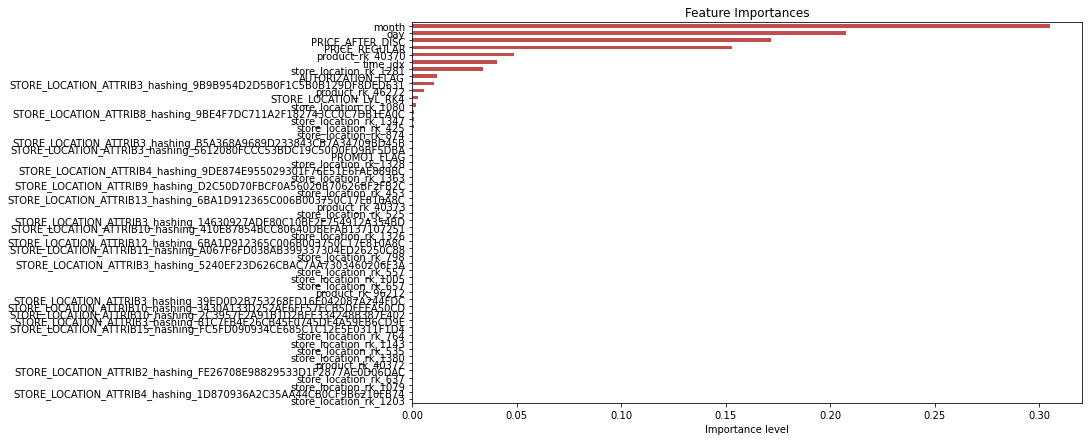

In [ ]:
features(rf, d_dum.drop(['period_start_dt'], axis=1))

#### Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor(loss='huber', learning_rate=0.3, random_state=13)
train(gb, X, y)

75.10605867737884

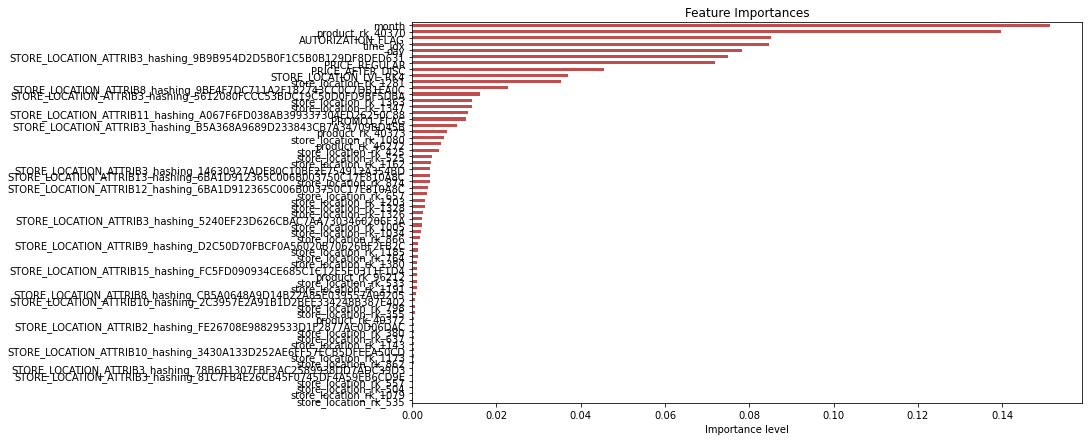

In [ ]:
features(gb, d_dum.drop(['period_start_dt'], axis=1))

### HistGradientBoosting

In [ ]:
datas = []
data_ = data[data.columns[:8].append(data.columns[-3:])]
for i in data_.store_location_rk.unique():
  for j in data_.product_rk.unique():
    if i not in [533, 540, 1005, 1080, 1202]:
      d = data_[(data_.product_rk == j) & (data_.store_location_rk == i)]
      d = d.drop(['product_rk', 'store_location_rk', 'period_start_dt'], axis=1)
      datas.append(d.rename({'demand':'y'}, axis='columns'))

In [ ]:
hgb_predicts = pd.DataFrame()
for d in tqdm(datas):    
    hgb = HistGradientBoostingRegressor(loss='least_absolute_deviation', learning_rate=0.17, max_depth=15,
                                        l2_regularization=1.5, max_iter=10000, random_state=13)
    train = d[d.y.isna() == False]
    test_X = d[d.y.isna()].drop('y', axis=1).to_numpy()
    X = train.drop('y', axis=1).to_numpy()
    y = train.y.to_numpy()
    hgb.fit(X, y)
    pred = hgb.predict(test_X)
    df = pd.DataFrame(pred, index=d[d.y.isna()].index)
    hgb] = hgb_predicts.append(df)
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



In [ ]:
pred = hgb.predict(t_dum.drop('demand', axis=1))

### Ensembles

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('hgb', HistGradientBoostingRegressor(loss='least_absolute_deviation', learning_rate=0.17, max_depth=15,
                                        l2_regularization=1.5, max_iter=100000, random_state=13)))
	level0.append(('cart', RandomForestRegressor(n_estimators=100, random_state=1)))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

#### Stacking Regressor on 210 datasets + zero_forecasts

In [ ]:
datas = []
for i in data.store_location_rk.unique():
  for j in data.product_rk.unique():
    if i not in [533, 540, 1005, 1080, 1202]:
      d = data[(data.product_rk == j) & (data.store_location_rk == i)]
      datas.append(d.drop('period_start_dt', axis=1))

In [ ]:
stacked_preds = pd.DataFrame()
for d in tqdm(datas):
  model = get_stacking()
  train = d[d.demand.isna() == False]
  test_X = d[d.demand.isna()].drop('demand', axis=1).to_numpy()
  X = train.drop('demand', axis=1).to_numpy()
  y = train.demand.to_numpy()
  model.fit(X, y)
  pred = model.predict(test_X)
  df = pd.DataFrame(pred, index=dum[dum.demand.isna()].index)
  stacked_preds = stacked_preds.append(df)

In [ ]:
stacked_preds = stacked_preds.append(zero_forecasts).sort_index()

#### Stacking Regressor on single dataset with dummies + zero_forecasts (**best model**)

In [ ]:
dum.drop('period_start_dt', axis=1, inplace=True)

In [ ]:
model = get_stacking()
train = dum[dum.demand.isna() == False]
test_X = dum[dum.demand.isna()].drop('demand', axis=1).to_numpy()
X = train.drop('demand', axis=1).to_numpy()
y = train.demand.to_numpy()
model.fit(X, y)
pred = model.predict(test_X)
df = pd.DataFrame(pred, index=dum[dum.demand.isna()].index)

In [ ]:
df.loc[zero_forecasts.index] = 0

## NN

In [ ]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet, NBeats
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters


In [ ]:
data.period_start_dt = pd.to_datetime(data.period_start_dt)
data.store_location_rk = data.store_location_rk.astype(str).astype('category')
data.product_rk = data.product_rk.astype(str).astype('category')

In [ ]:
hashing = data.columns[9:-5]

In [ ]:
for i in hashing:
  data[i] = data[i].astype('category')

In [ ]:
data['AUTORIZATION_FLAG'] = data['AUTORIZATION_FLAG'].astype(str).astype('category')
data['PROMO1_FLAG'] = data['PROMO1_FLAG'].astype(str).astype('category')

In [ ]:
data.head()

,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,STORE_LOCATION_LVL_RK4,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing,season,time_idx,day,avg_volume_by_store,avg_volume_by_product
0,40369,309,2016-12-19,29.0,0.0,500.00000,500.000000,0.0,203,1B208496FEF79DB5BE9F374BF65865E6,B5A368A9689D233843CB7A34709BD45B,1D870936A2C35AA44CB0CF9B6210FB74,F2D475B39396781ED7F2D76E648AFAE4,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,FC5FD090934CE685C1C12E5E0311F1D4,winter,0,19,63.0,56.657143
1,40370,309,2016-12-19,64.0,0.0,1000.00000,1000.000000,0.0,203,1B208496FEF79DB5BE9F374BF65865E6,B5A368A9689D233843CB7A34709BD45B,1D870936A2C35AA44CB0CF9B6210FB74,F2D475B39396781ED7F2D76E648AFAE4,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,FC5FD090934CE685C1C12E5E0311F1D4,winter,0,19,63.0,77.685714
2,40372,309,2016-12-19,32.0,0.0,2000.00000,2000.000000,0.0,203,1B208496FEF79DB5BE9F374BF65865E6,B5A368A9689D233843CB7A34709BD45B,1D870936A2C35AA44CB0CF9B6210FB74,F2D475B39396781ED7F2D76E648AFAE4,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,FC5FD090934CE685C1C12E5E0311F1D4,winter,0,19,63.0,30.928571
3,40373,309,2016-12-19,10.0,0.0,3000.00000,3000.000000,0.0,203,1B208496FEF79DB5BE9F374BF65865E6,B5A368A9689D233843CB7A34709BD45B,1D870936A2C35AA44CB0CF9B6210FB74,F2D475B39396781ED7F2D76E648AFAE4,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,FC5FD090934CE685C1C12E5E0311F1D4,winter,0,19,63.0,20.171429
4,46272,309,2016-12-19,15.0,0.0,230.90602,176.031462,0.0,203,1B208496FEF79DB5BE9F374BF65865E6,B5A368A9689D233843CB7A34709BD45B,1D870936A2C35AA44CB0CF9B6210FB74,F2D475B39396781ED7F2D76E648AFAE4,D2C50D70FBCF0A56020B70626BF2FB2C,410E87854BCC80640DBEFAB137107251,A067F6FD038AB399337304ED26250C88,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,FC5FD090934CE685C1C12E5E0311F1D4,winter,0,19,63.0,32.257143


In [ ]:
max_prediction_length, max_encoder_length = 4, 12
training_cutoff = data["time_idx"].max() - max_prediction_length

training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="demand",
    group_ids=["product_rk", "store_location_rk"],
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["product_rk", "store_location_rk"],
    static_reals=["STORE_LOCATION_LVL_RK4", ],
    time_varying_known_categoricals=["day", "season", "PROMO1_FLAG", "AUTORIZATION_FLAG"],
    time_varying_known_reals=["time_idx", "PRICE_REGULAR", "PRICE_AFTER_DISC"],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=[
        "demand"
    ],
    target_normalizer=GroupNormalizer(
        groups=["store_location_rk", "product_rk"], transformation="softplus"
    ),  # use softplus and normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    allow_missings=True,
    add_encoder_length=True,
)

# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
validation = TimeSeriesDataSet.from_dataset(training, data, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 32  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

In [ ]:
# calculate baseline mean absolute error, i.e. predict next value as the last available value from the history
actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
SMAPE()(baseline_predictions, actuals)

tensor(0.8312)

In [ ]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    gpus=0,
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.1,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Global seed set to 42
GPU available: False, used: False
TPU available: None, using: 0 TPU cores


Number of parameters in network: 24.7k



   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 908   
3  | prescalers                         | ModuleDict                      | 144   
4  | static_variable_selection          | VariableSelectionNetwork        | 2.7 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 3.8 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 3.1 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell_lstm   | GatedResidualNetwork            | 1.1 

Restored states from the checkpoint file at /content/lr_find_temp_model.ckpt


suggested learning rate: 0.01862087136662867


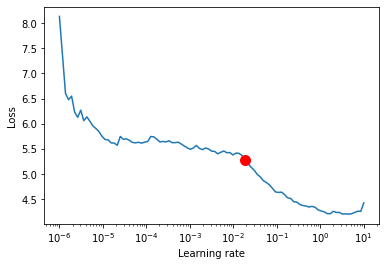

In [ ]:
# find optimal learning rate
res = trainer.tuner.lr_find(
    tft,
    train_dataloader=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [ ]:
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

# create study
study = optimize_hyperparameters(
    train_dataloader,
    val_dataloader,
    model_path="optuna_test",
    n_trials=200,
    max_epochs=50,
    gradient_clip_val_range=(0.01, 1.0),
    hidden_size_range=(8, 128),
    hidden_continuous_size_range=(8, 128),
    attention_head_size_range=(1, 4),
    learning_rate_range=(0.001, 0.1),
    dropout_range=(0.1, 0.3),
    trainer_kwargs=dict(limit_train_batches=30),
    reduce_on_plateau_patience=4,
    use_learning_rate_finder=False,  # use Optuna to find ideal learning rate or use in-built learning rate finder
)

# save study results - also we can resume tuning at a later point in time
with open("test_study.pkl", "wb") as fout:
    pickle.dump(study, fout)

# show best hyperparameters
print(study.best_trial.params)

In [ ]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = tft

In [ ]:
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader)
(actuals - predictions).abs().mean()

 # Записываем сабмишн

In [ ]:
sample = pd.read_csv('/content/hw2_data_analysis/demand-forecasting-in-retail/sample_submission.csv')
sample.head()

,id,predicted
0,908,0
1,909,0
2,910,0
3,911,0
4,912,0


In [ ]:
sample['predicted'] = df[0].to_numpy()
sample.to_csv('stacking_regressor_all.csv', index=False)

In [ ]:
data1 = data.copy()
data1['demand'][data1.demand.isna()] = sample.predicted.to_numpy()

for d in data1.store_location_rk.unique():
    display(px.line(data1.groupby(['store_location_rk'])['product_rk', 'period_start_dt', 'demand'].get_group(d),
                                    color='product_rk', x='period_start_dt', y='demand', title=f"store: {d}"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

